In [1]:
import numpy as np
import pandas as pd
import joblib, pickle
import random

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\kashyap\\Desktop\\DataTrained'

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 26EE-3E1E

 Directory of C:\Users\kashyap\Desktop\DataTrained

24-06-2020  18:12    <DIR>          .
24-06-2020  18:12    <DIR>          ..
24-06-2020  17:28    <DIR>          .ipynb_checkpoints
24-06-2020  18:03         1,178,767 Hackathon.ipynb
24-06-2020  18:11           208,054 Hackathon_2.ipynb
24-06-2020  18:11           144,336 Hackathon_3.ipynb
24-06-2020  18:12            13,958 hackathon_4.ipynb
24-06-2020  15:39             8,407 py1.ipynb
24-06-2020  17:05            28,130 py2.ipynb
03-06-2020  16:41            33,806 test_file1591182717.xlsx
03-06-2020  16:41           510,734 train_file1591182717.xlsx
24-06-2020  17:58               555 Untitled.ipynb
               9 File(s)      2,126,747 bytes
               3 Dir(s)  175,515,967,488 bytes free


In [4]:
df_train = pd.read_excel('train_file1591182717.xlsx')
df_test = pd.read_excel('test_file1591182717.xlsx')

In [5]:
df_test.columns

Index(['PATIENT_ID', 'RE_DATE', 'Lactate dehydrogenase',
       'Hypersensitive c-reactive protein', '(%)lymphocyte', 'Admission time',
       'Discharge time', 'outcome'],
      dtype='object')

In [6]:
df_train.shape, df_test.shape

((6120, 81), (757, 8))

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PATIENT_ID,375.0,188.000000,108.397417,1.00,94.5000,188.000,281.5000,375.000
age,6120.0,59.443301,16.372234,18.00,47.0000,62.000,71.0000,95.000
gender,6120.0,1.390523,0.487907,1.00,1.0000,1.000,2.0000,2.000
outcome,6120.0,0.474673,0.499399,0.00,0.0000,0.000,1.0000,1.000
Hypersensitive cardiac troponinI,507.0,1223.229980,5391.612529,1.90,4.4000,20.600,223.7500,50000.000
hemoglobin,975.0,123.124923,23.737995,6.40,113.0000,125.000,137.0000,178.000
Serum chloride,975.0,103.135692,7.746938,71.50,99.0500,102.100,105.6500,140.400
Prothrombin time,662.0,16.674924,9.501093,11.50,13.6000,14.800,16.7000,120.000
procalcitonin,459.0,1.106601,4.663412,0.02,0.0400,0.100,0.4050,57.170
eosinophils(%),957.0,0.628945,1.066820,0.00,0.0000,0.100,0.8000,8.600


In [8]:
df_train.head(3)

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,NaN,NaN,0.6,NaN,NaN,NaN,0.3,NaN,NaN,105.0,10.7,NaN,NaN,NaN,11.9,65.8,NaN,NaN,NaN,NaN,91.8,39.2,3.54,NaN,347.0,NaN,NaN,NaN,0.8,NaN,4.27,0.02,NaN,NaN,NaN,2.33,NaN,11.9,NaN,40.8,NaN,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.9,NaN,NaN,0.38,16.3,NaN,NaN,NaN,0.01,NaN,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,NaN,NaN,NaN,NaN,46.0,33.3,NaN,NaN,8.3,NaN,NaN,NaN,NaN,4.3,NaN,NaN,69.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,2.29,4.33,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,33.0,418.0,21.2,2.02,NaN,306.0,NaN,NaN,NaN,NaN,NaN,36.0,24.0,NaN,NaN,NaN,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0


In [9]:
df_train.isnull().sum()

PATIENT_ID                                                       5745
RE_DATE                                                            14
age                                                                 0
gender                                                              0
Admission time                                                      0
Discharge time                                                      0
outcome                                                             0
Hypersensitive cardiac troponinI                                 5613
hemoglobin                                                       5145
Serum chloride                                                   5145
Prothrombin time                                                 5458
procalcitonin                                                    5661
eosinophils(%)                                                   5163
Interleukin 2 receptor                                           5852
Alkaline phosphatase

In [10]:
df_train_2 = df_train.copy(deep= True)
df_test_2 = df_test.copy(deep= True)

In [11]:
df_train['PATIENT_ID'] = df_train['PATIENT_ID'].ffill()

In [12]:
df_test['PATIENT_ID'] = df_test['PATIENT_ID'].ffill()

In [13]:
df_test.head(3)

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1.0,2020-02-10 11:15:00,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,1.0,2020-02-10 12:07:00,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,1.0,2020-02-13 09:35:00,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0


In [14]:
df = pd.concat([df_train, df_test])

In [15]:
df = df.sort_values('PATIENT_ID')

In [16]:
df['PATIENT_ID'].value_counts()

258.0    59
106.0    57
372.0    53
86.0     51
252.0    49
         ..
268.0     1
192.0     1
347.0     1
201.0     1
285.0     1
Name: PATIENT_ID, Length: 375, dtype: int64

In [17]:
df_mean = pd.DataFrame(columns= df.columns)
for i in df["PATIENT_ID"].unique():
    temp = df[df["PATIENT_ID"]== i]
    temp.fillna(temp.mean(), inplace = True)
    df_mean = pd.concat([df_mean, temp])

In [18]:
df_mean.fillna(0, inplace = True)
df_mean.head(5)

,(%)lymphocyte,2019-nCoV nucleic acid detection,Activation of partial thromboplastin time,Admission time,Alkaline phosphatase,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Corrected calcium,D-D dimer,Direct bilirubin,Discharge time,ESR,Eosinophil count,Fibrin degradation products,HBsAg,HCO3-,HCV antibody quantification,HIV antibody quantification,Hypersensitive c-reactive protein,Hypersensitive cardiac troponinI,Interleukin 10,Interleukin 1β,Interleukin 2 receptor,Interleukin 6,Interleukin 8,International standard ratio,Lactate dehydrogenase,Mean platelet volume,PATIENT_ID,PH value,PLT distribution width,Platelet count,Prothrombin activity,Prothrombin time,Quantification of Treponema pallidum antibodies,RBC distribution width SD,RE_DATE,Red blood cell count,Red blood cell distribution width,Serum chloride,Serum potassium,Thrombin time,Total bilirubin,Total cholesterol,Tumor necrosis factorα,Urea,Uric acid,White blood cell count,age,albumin,antithrombin,aspartate aminotransferase,basophil count(#),basophil(%),calcium,creatinine,eGFR,eosinophils(%),ferritin,fibrinogen,gender,globulin,glucose,glutamic-pyruvic transaminase,hematocrit,hemoglobin,indirect bilirubin,lymphocyte count,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,mean corpuscular volume,monocytes count,monocytes(%),neutrophils count,neutrophils(%),outcome,platelet large cell ratio,procalcitonin,serum sodium,thrombocytocrit,total protein,γ-glutamyl transpeptidase
0,24.314286,-1.0,38.4,2020-01-30 22:12:47,57.8,60.0,2.412,1.26,3.72,2020-02-17 12:40:09,41.0,0.064,0.0,0.03,26.5,0.06,0.09,11.42,19.9,0.0,0.0,0.0,0.0,0.0,1.02,219.571429,11.22,1.0,7.4150,14.0,154.2,98.333333,13.466667,0.05,40.5,2020-01-31 01:09:00,3.723333,11.84,100.22,4.606,17.75,9.64,4.164,0.0,6.9,368.4,7.556667,73.0,34.48,0.0,25.6,0.016,0.2,2.162,99.0,66.7,0.78,634.9,3.22,1.0,32.38,8.728,29.2,38.36,133.2,5.92,1.802,32.12,347.4,92.52,0.614,7.94,5.852,68.36,0,35.08,0.09,140.54,0.17,66.86,33.0
3,24.314286,-1.0,38.4,2020-02-09 10:47:24,57.8,60.0,2.412,1.26,3.72,2020-02-21 14:51:12,41.0,0.064,0.0,0.03,26.5,0.06,0.09,2.70,19.9,0.0,0.0,0.0,0.0,0.0,1.02,194.000000,11.22,1.0,6.7075,14.0,154.2,98.333333,13.466667,0.05,40.5,2020-02-13 10:06:00,3.723333,11.84,100.22,4.606,17.75,9.64,4.164,0.0,6.9,368.4,7.556667,73.0,34.48,0.0,25.6,0.016,0.2,2.162,99.0,66.7,0.78,634.9,3.22,1.0,32.38,8.728,29.2,38.36,133.2,5.92,1.802,32.12,347.4,92.52,0.614,7.94,5.852,68.36,0,35.08,0.09,140.54,0.17,66.86,33.0
0,28.000000,-1.0,38.4,2020-02-09 10:47:24,57.8,60.0,2.412,1.26,3.72,2020-02-21 14:51:12,41.0,0.064,0.0,0.03,26.5,0.06,0.09,11.42,19.9,0.0,0.0,0.0,0.0,0.0,1.02,219.571429,11.22,1.0,6.7075,14.0,154.2,98.333333,13.466667,0.05,40.5,2020-02-10 11:15:00,3.723333,11.84,100.22,4.606,17.75,9.64,4.164,0.0,6.9,368.4,7.556667,73.0,34.48,0.0,25.6,0.016,0.2,2.162,99.0,66.7,0.78,634.9,3.22,1.0,32.38,8.728,29.2,38.36,133.2,5.92,1.802,32.12,347.4,92.52,0.614,7.94,5.852,68.36,0,35.08,0.09,140.54,0.17,66.86,33.0
2,28.600000,-1.0,38.4,2020-02-09 10:47:24,57.8,60.0,2.412,1.26,3.72,2020-02-21 14:51:12,41.0,0.064,0.0,0.03,26.5,0.06,0.09,11.42,19.9,0.0,0.0,0.0,0.0,0.0,1.02,219.571429,11.22,1.0,6.7075,14.0,154.2,98.333333,13.466667,0.05,40.5,2020-02-13 09:35:00,3.723333,11.84,100.22,4.606,17.75,9.64,4.164,0.0,6.9,368.4,7.556667,73.0,34.48,0.0,25.6,0.016,0.2,2.162,99.0,66.7,0.78,634.9,3.22,1.0,32.38,8.728,29.2,38.36,133.2,5.92,1.802,32.12,347.4,92.52,0.614,7.94,5.852,68.36,0,35.08,0.09,140.54,0.17,66.86,33.0
23,24.314286,-1.0,38.4,2020-01-30 22:12:47,57.8,60.0,2.412,1.26,3.72,2020-02-17 12:40:09,41.0,0.064,0.0,0.03,26.5,0.06,0.09,11.42,19.9,0.0,0.0,0.0,0.0,0.0,1.02,219.571429,11.22,1.0,6.7075,14.0,154.2,98.333333,13.466667,0.05,40.5,2020-02-17 08:31:00,3.723333,11.84,100.22,4.606,17.75,9.64,4.164,0.0,6.9,368.4,7.556667,73.0,34.48,0.0,25.6,0.016,0.2,2.162,99.0,66.7,0.78,634.9,3.22,1.0,32.38,8.728,29.2,38.36,133.2,5.92,1.802,32.12,347.4,92.52,0.614,7.94,5.852,68.36,0,35.08,0.09,140.54,0.17,66.86,33.0


## Visualization

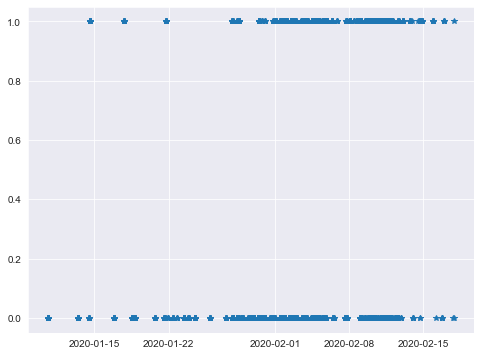

In [19]:
plt.figure(figsize = (8,6))
plt.plot(df_mean['Admission time'], df_mean['outcome'], "*")
plt.show()

In [20]:
df_clean = df_mean.drop(["Admission time", "Discharge time", "RE_DATE", "outcome"], axis = 1)

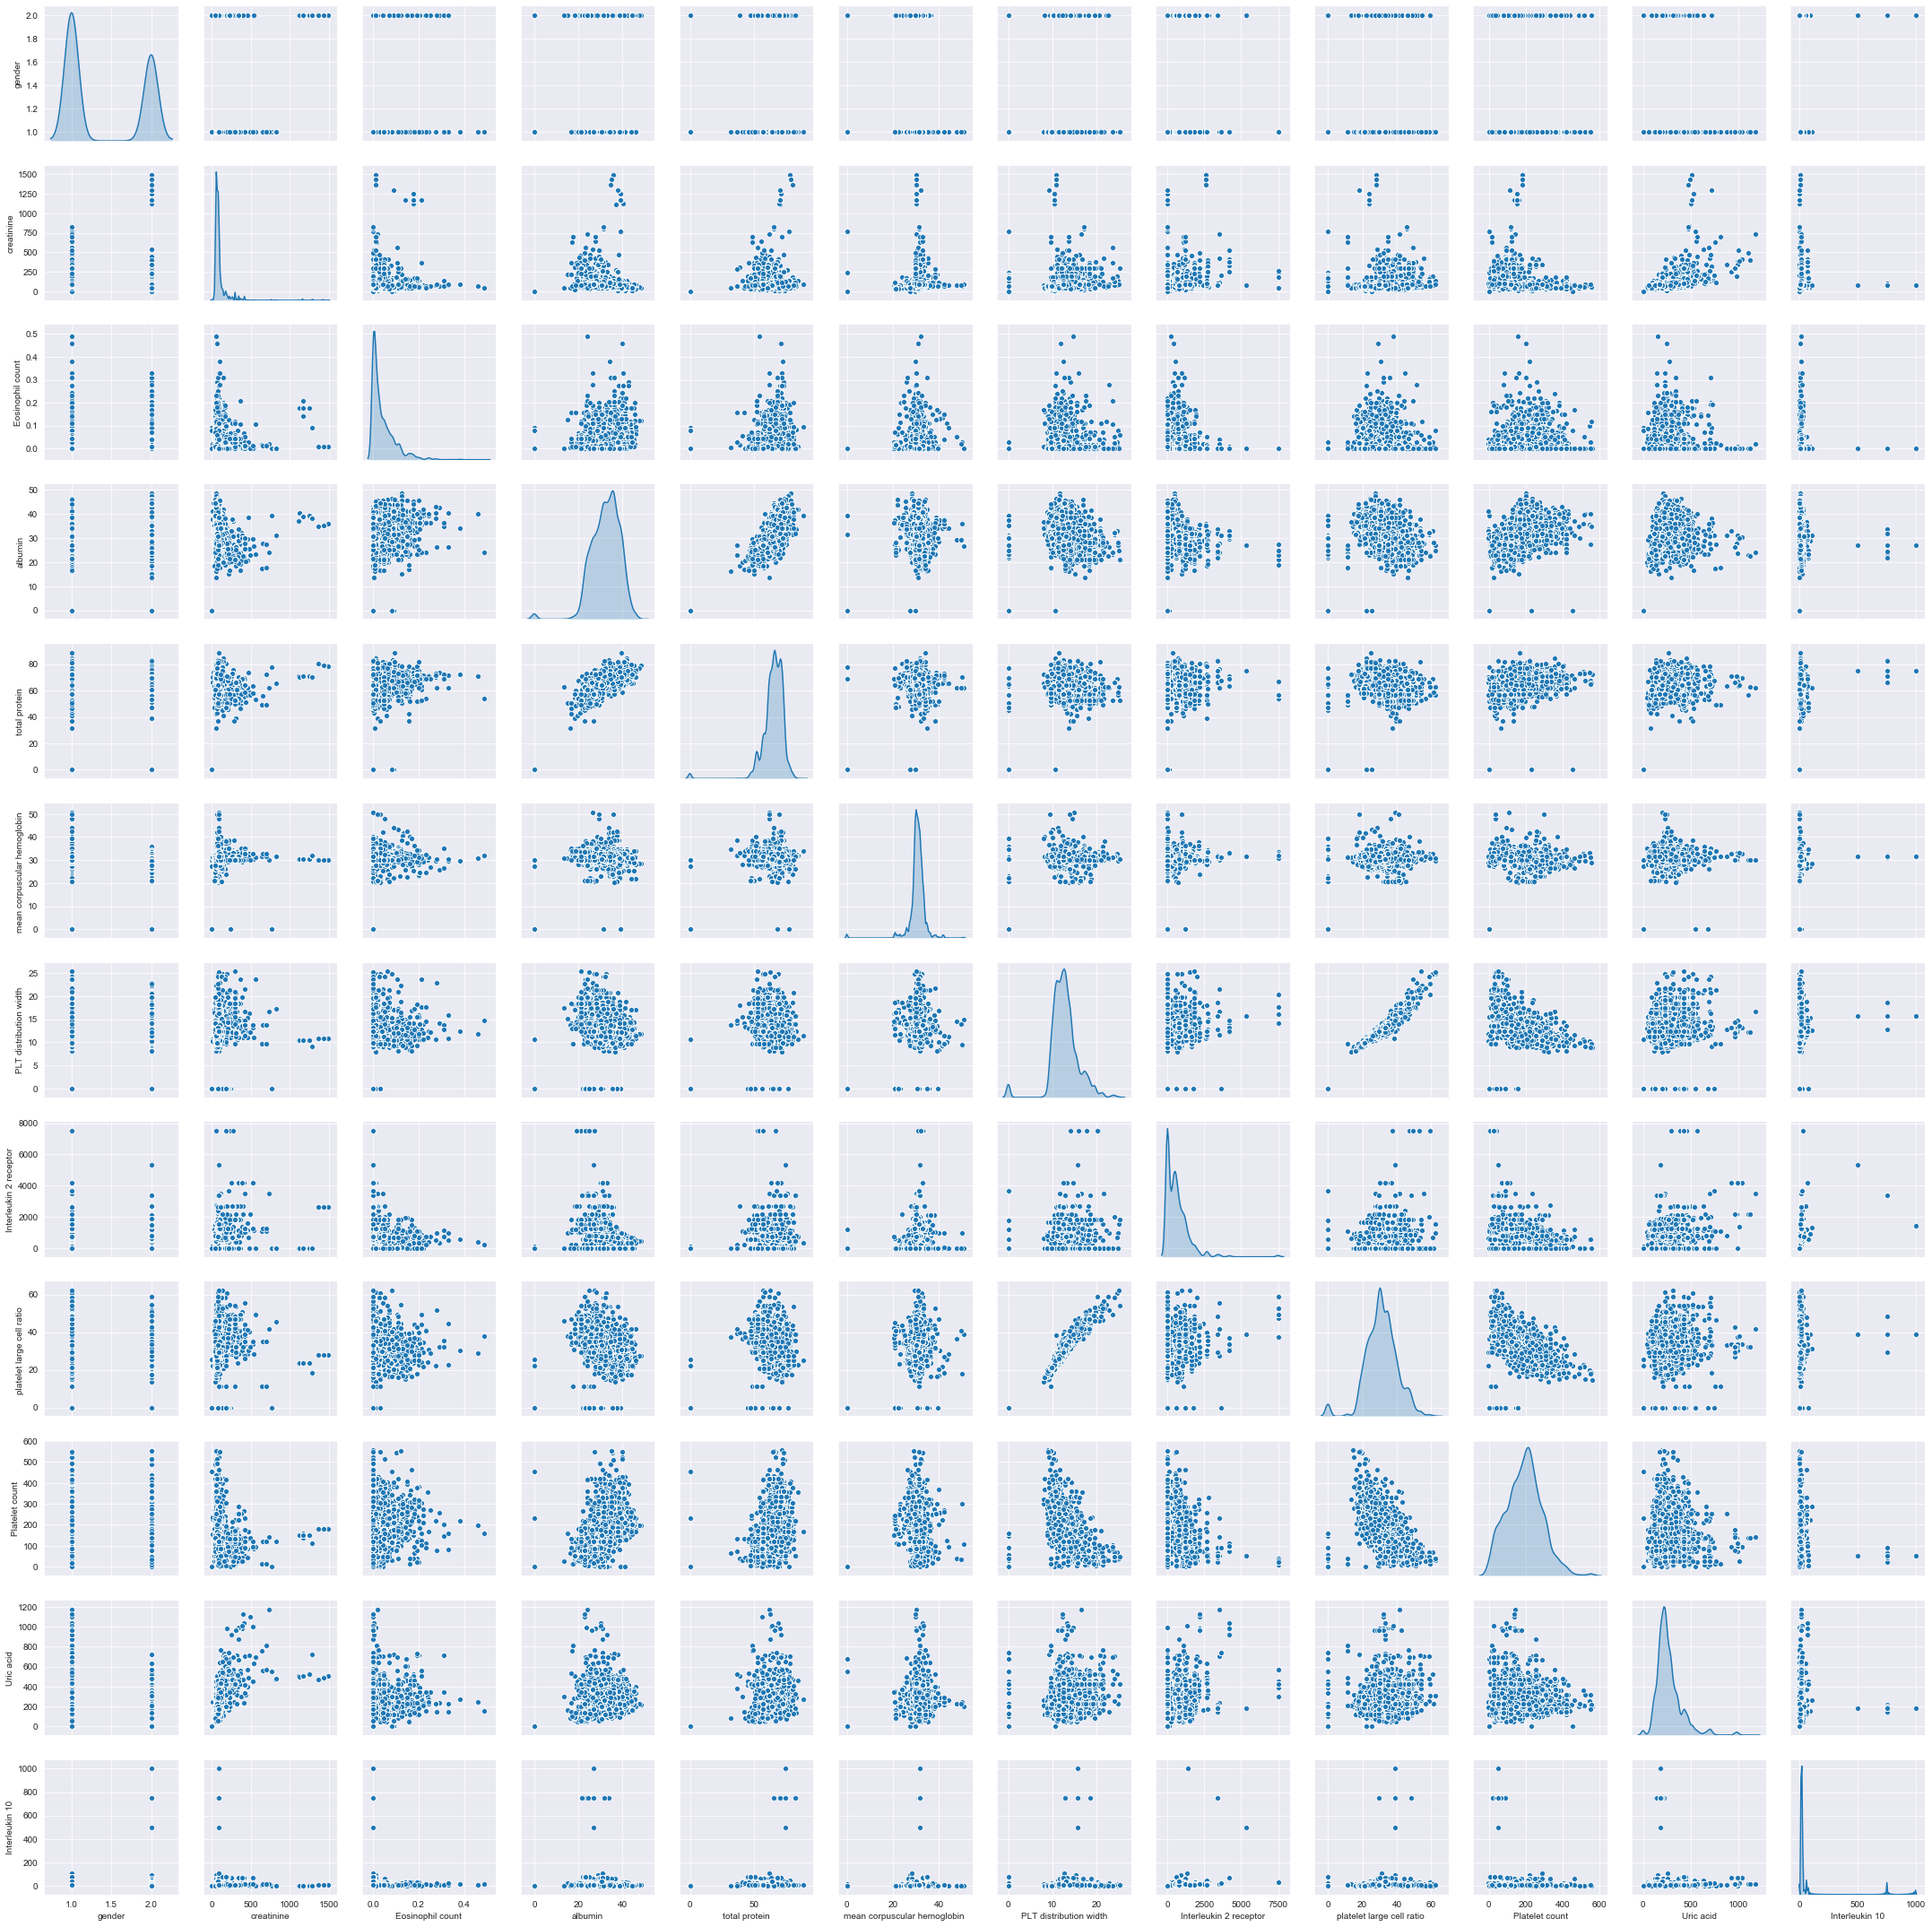

In [22]:
df_kde = df_clean.loc[:,list(random.choices(df_clean.columns, k = 12))]

sns.pairplot(df_kde, diag_kind='kde')
plt.show()

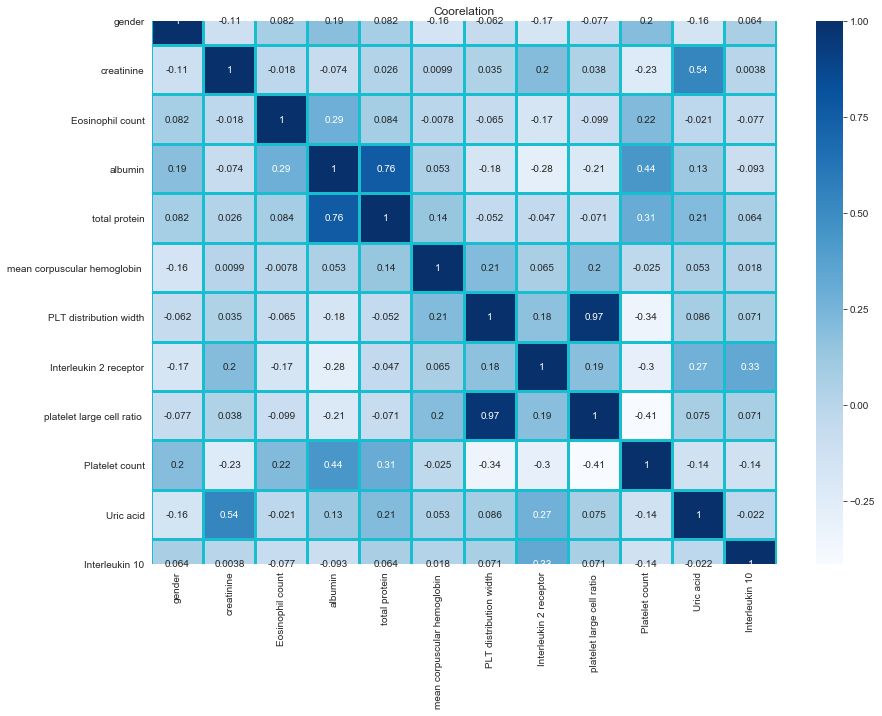

In [23]:
plt.figure(figsize = (14, 10))
sns.heatmap(df_kde.corr(), annot = True, cmap = 'Blues', linecolor = 'tab:cyan', linewidths = 2)
plt.title("Coorelation")
plt.show()

In [24]:
scaler = MinMaxScaler()

column_names = df_clean.columns
data_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns = column_names)
data_scaled.sample(n = 10)

,(%)lymphocyte,2019-nCoV nucleic acid detection,Activation of partial thromboplastin time,Alkaline phosphatase,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Corrected calcium,D-D dimer,Direct bilirubin,ESR,Eosinophil count,Fibrin degradation products,HBsAg,HCO3-,HCV antibody quantification,HIV antibody quantification,Hypersensitive c-reactive protein,Hypersensitive cardiac troponinI,Interleukin 10,Interleukin 1β,Interleukin 2 receptor,Interleukin 6,Interleukin 8,International standard ratio,Lactate dehydrogenase,Mean platelet volume,PATIENT_ID,PH value,PLT distribution width,Platelet count,Prothrombin activity,Prothrombin time,Quantification of Treponema pallidum antibodies,RBC distribution width SD,Red blood cell count,Red blood cell distribution width,Serum chloride,Serum potassium,Thrombin time,Total bilirubin,Total cholesterol,Tumor necrosis factorα,Urea,Uric acid,White blood cell count,age,albumin,antithrombin,aspartate aminotransferase,basophil count(#),basophil(%),calcium,creatinine,eGFR,eosinophils(%),ferritin,fibrinogen,gender,globulin,glucose,glutamic-pyruvic transaminase,hematocrit,hemoglobin,indirect bilirubin,lymphocyte count,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,mean corpuscular volume,monocytes count,monocytes(%),neutrophils count,neutrophils(%),platelet large cell ratio,procalcitonin,serum sodium,thrombocytocrit,total protein,γ-glutamyl transpeptidase
5939,0.032500,1.0,0.335417,0.233871,0.011714,0.853047,0.350000,0.024589,0.354545,0.005102,0.786164,0.00004,0.454545,0.047847,0.333333,0.483229,0.003822,0.00890,0.056497,0.068400,0.099340,0.004180,0.143917,0.383503,0.873333,0.823529,0.793126,0.778656,0.161896,0.319249,0.186667,0.008368,0.448367,0.020886,0.549815,0.830009,0.371875,0.121886,0.032035,0.319178,0.039881,0.288012,0.371599,0.014660,0.961039,0.578875,0.639706,0.026911,0.437500,0.102941,0.763359,0.088677,0.194978,0.000000,0.019312,0.257576,0.0,0.803030,0.159033,0.026667,0.648662,0.672753,0.050540,0.009300,0.656004,0.687257,0.794365,0.005135,0.014623,0.759076,0.981800,0.784566,0.017667,0.843257,0.254902,0.775272,0.066029
6556,0.048333,1.0,0.209722,0.179032,0.029264,0.887694,0.350000,0.020429,0.163636,0.000000,0.000000,0.00000,0.441690,0.000000,0.000000,0.364063,0.007086,0.00570,0.056497,0.166267,0.006820,0.007976,0.116963,0.209963,0.720000,0.949198,0.856609,0.537549,0.135957,0.424883,0.157222,0.000000,0.423654,0.005817,0.527675,0.777066,0.295573,0.129504,0.024323,0.543836,0.104167,0.201267,0.312358,0.010495,0.727273,0.548697,0.000000,0.007894,0.250000,0.117647,0.790076,0.060343,0.321726,0.000000,0.000000,0.190785,0.0,0.561265,0.491979,0.008958,0.776291,0.747191,0.034000,0.010111,0.600394,0.638132,0.783011,0.027555,0.115094,0.485832,0.918099,0.530547,0.003411,0.832313,0.156863,0.620819,0.105647
6798,0.027500,1.0,0.332060,0.214337,0.078605,0.818001,0.070556,0.099741,0.845455,0.089796,0.079455,0.00000,0.479840,0.014354,0.222222,0.725586,0.000614,0.01030,0.056497,0.244400,0.056860,0.013584,0.109916,0.205499,0.863333,0.991979,0.660939,0.728063,0.240608,0.467136,0.149306,0.015063,0.466461,0.031445,0.577860,0.851917,0.476989,0.108915,0.079208,0.386149,0.141667,0.398325,0.360003,0.010392,0.792208,0.434614,0.557353,0.112188,0.316667,0.135294,0.682252,0.198640,0.075081,0.027907,0.049136,0.774737,0.0,0.624286,0.095559,0.051528,0.696941,0.666854,0.028180,0.004941,0.590748,0.635798,0.774012,0.017485,0.081509,0.467208,0.946006,0.752894,0.028599,0.854960,0.337255,0.594263,0.294323
2672,0.355000,0.0,0.000000,0.109677,0.000000,0.849462,0.003667,0.006656,0.018182,0.020408,0.000000,0.00004,0.735537,0.023923,0.296296,0.000313,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.072700,0.114622,0.763333,0.304813,0.000000,0.539526,0.351521,0.732394,0.109167,0.003347,0.325243,0.005837,0.422509,0.716524,0.303906,0.000000,0.009887,0.639726,0.000000,0.074561,0.118197,0.002470,0.428571,0.862140,0.000000,0.039290,0.083333,0.147059,0.866412,0.036740,0.466964,0.029070,0.000000,0.000000,1.

In [25]:
x = data_scaled
y = df_mean[['outcome']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5501, 77), (1376, 77), (5501, 1), (1376, 1))

In [27]:
from sklearn.ensemble import AdaBoostClassifier
accuracy = []
precision = []
recall = []
f1_score = []
logLoss = []

def calculate_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    pre = metrics.precision_score(y_true = y_test, y_pred = y_pred)
    rec = metrics.recall_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred)
    log_loss = metrics.log_loss(y_true = y_test, y_pred = y_pred)
    
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    f1_score.append(f1)
    logLoss.append(log_loss)
 
kfold_min = []
kfold_mean = []
kfold_max = []

def calculate_kfold(estimator):
    accuracies = cross_val_score(estimator, x, y, cv = 20)
    kfold_min.append(accuracies.min())
    kfold_mean.append(accuracies.mean())
    kfold_max.append(accuracies.max())
    
    
def save_model(model, filename):
    saved_model = pickle.dumps(model)
    with open(filename + ".pickle", "wb") as f:
        f.write(saved_model)
        
    
def load_model(file_name):
    file = open(file_name, "rb")
    data = file.read()
    loaded_model = pickle.loads(data)
    return loaded_model

# **2.2 Logistic Regression**

In [28]:
AdaLogisticRegression = AdaBoostClassifier(n_estimators=20, base_estimator=LogisticRegression() ,learning_rate=1)
AdaLogisticRegression.fit(x_train, y_train)
logisticRegression_prediction = AdaLogisticRegression.predict(x_test)
calculate_metrics(y_test, logisticRegression_prediction)
calculate_kfold(AdaLogisticRegression)

# **2.3 Linear Support Vector Classifier**

In [29]:
AdaLinearSVC = AdaBoostClassifier(n_estimators=20, base_estimator=LinearSVC() ,learning_rate=1, algorithm = "SAMME")
AdaLinearSVC.fit(x_train, y_train)
linearSVC_prediction = AdaLinearSVC.predict(x_test)
calculate_metrics(y_test, linearSVC_prediction)
calculate_kfold(AdaLinearSVC)

# **2.4 KNeighbors**

In [30]:
knnClassifier = KNeighborsClassifier()
knnClassifier.fit(x_train, y_train)
knnClassifier_prediction = knnClassifier.predict(x_test)
calculate_metrics(y_test, knnClassifier_prediction)
calculate_kfold(knnClassifier)

# 2.5 Decision Tree

In [31]:
adaDecisionTreeClassifier = AdaBoostClassifier(n_estimators=20, base_estimator=DecisionTreeClassifier() ,learning_rate=1)
adaDecisionTreeClassifier.fit(x_train, y_train)
dtClassifier_prediction = adaDecisionTreeClassifier.predict(x_test)
calculate_metrics(y_test, dtClassifier_prediction)
calculate_kfold(adaDecisionTreeClassifier)

# RandomForestClassifier

In [32]:
AdaRandomForestClassifier = AdaBoostClassifier(n_estimators=20, base_estimator=RandomForestClassifier() ,learning_rate=1)
AdaRandomForestClassifier.fit(x_train, y_train)
rfClassifier_prediction = AdaRandomForestClassifier.predict(x_test)
calculate_metrics(y_test, rfClassifier_prediction)
calculate_kfold(AdaRandomForestClassifier)

# **3.0 Combine All Metrics**

In [33]:
results = pd.DataFrame(data = {'accuracy':accuracy, 'precision': precision ,
                               'recall': recall,'f1_score': f1_score,'kfold_min': kfold_min,
                               'kfold_mean': kfold_mean,'kfold_max': kfold_max,"Log Loss":logLoss}, 
             index = ['Logistic Regression', 'Linear SVC', 'K Neighbors',"Decision Tree","Random Forest"] )
results

,accuracy,precision,recall,f1_score,kfold_min,kfold_mean,kfold_max,Log Loss
Logistic Regression,0.928779,0.952998,0.894977,0.923077,0.587209,0.930175,1.0,2.459901
Linear SVC,0.974564,0.976994,0.969559,0.973262,0.578488,0.918839,1.0,0.878539
K Neighbors,0.976017,0.995238,0.954338,0.974359,0.521866,0.873477,1.0,0.828330
Decision Tree,0.992006,0.995399,0.987823,0.991597,0.626822,0.913899,1.0,0.276111
Random Forest,0.995640,0.998469,0.992390,0.995420,0.561047,0.915370,1.0,0.150606
